<a href="https://colab.research.google.com/github/Mritunjaysri01/machine_leaning/blob/master/MNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.datasets import mnist

In [4]:
( x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

In [0]:
single_image = x_train[0]

In [7]:
single_image.shape

(28, 28)

In [8]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

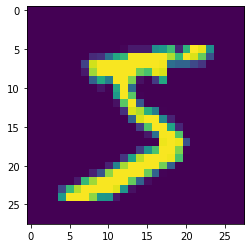

In [9]:
plt.imshow(single_image)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [0]:
y_example = to_categorical(y_train)

In [14]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [0]:
y_cat_train = to_categorical(y_train,10)

In [17]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [18]:
single_image.max()

255

In [19]:
single_image.min()

0

In [0]:
x_train = x_train/255

In [0]:
x_test = x_test/255

In [0]:
scaled_image = x_train[0]

In [23]:
scaled_image.max()

1.0

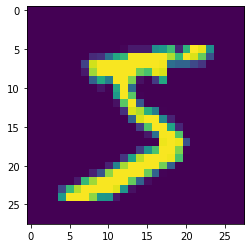

In [24]:
plt.imshow(scaled_image)

In [25]:
x_train.shape

(60000, 28, 28)

In [0]:
#batch size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)

In [0]:
x_test = x_test.reshape(10000,28,28,1) 


Model And Training

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [0]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),strides=(1,1),input_shape = (28,28,1),activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

#outyput layer softmax --> MUlti class

model.add(Dense(128,activation='relu'))

#Output layer

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [33]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),
          callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1528 - accuracy: 0.9545 - val_loss: 0.0532 - val_accuracy: 0.9840
Epoch 2/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0447 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0389 - val_accuracy: 0.9868
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0217 - accuracy: 0.9928 - val_loss: 0.0420 - val_accuracy: 0.9867


In [0]:
  metrics = pd.DataFrame(model.history.history)

<Figure size 720x576 with 0 Axes>

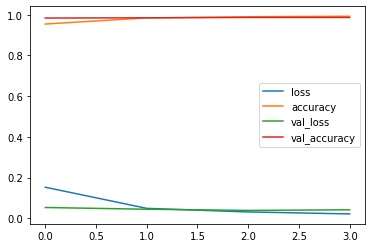

In [37]:
plt.figure(figsize=(10,8))
metrics.plot()

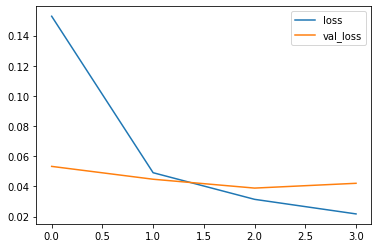

In [36]:
metrics[['loss','val_loss']].plot()

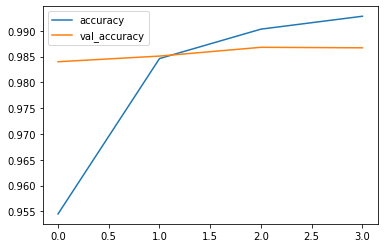

In [38]:
metrics[['accuracy','val_accuracy']].plot()

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04203201085329056, 0.9866999983787537]

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [43]:
y_cat_test.shape

(10000, 10)

In [44]:
y_test


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.96      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [46]:
confusion_matrix(y_test,predictions)

array([[ 975,    0,    0,    0,    0,    1,    2,    1,    1,    0],
       [   0, 1132,    1,    0,    0,    0,    2,    0,    0,    0],
       [   0,    2, 1018,    0,    0,    0,    2,   10,    0,    0],
       [   0,    0,    1,  996,    0,    8,    0,    2,    1,    2],
       [   0,    1,    3,    0,  968,    0,    4,    0,    0,    6],
       [   1,    0,    0,    3,    0,  886,    1,    1,    0,    0],
       [   2,    2,    1,    0,    2,    4,  947,    0,    0,    0],
       [   0,    2,    4,    0,    0,    1,    0, 1020,    1,    0],
       [   4,    1,    6,    5,    0,    7,    4,    5,  936,    6],
       [   0,    2,    0,    1,    7,    3,    0,    7,    0,  989]])

In [47]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


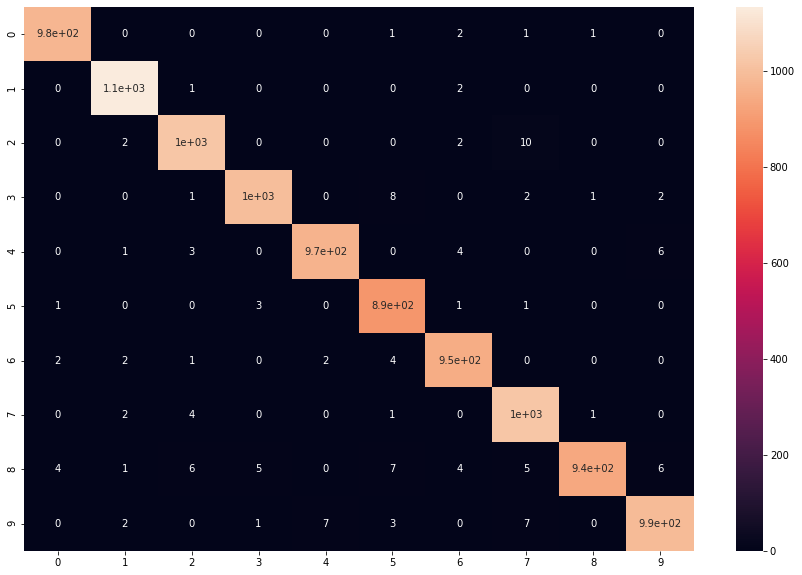

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [0]:
my_number = x_test[0]

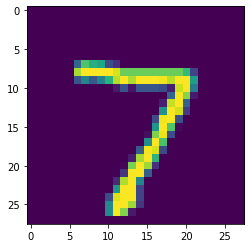

In [51]:
plt.imshow(my_number.reshape(28,28))

In [53]:
#num_image,width,height,color_channels
model.predict_classes(my_number.reshape(1,28,28,1))

array([7])